# Data API

- `tf.data`: https://www.tensorflow.org/api_docs/python/tf/data
- `tf.data.datasets`



<br>

<br>

## tf.data.datasets

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

```python
builders = tfds.list_builders()
print(builders)
```

In [3]:
data, info = tfds.load('mnist', with_info=True)
trin_data, test_data = data['train'], data['test']

In [4]:
info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

<br>

<br>

## tf.data

- **생성**
  - `from_tensor_slices()`: 개별 또는 다중 넘파이를 받고, 배치를 지원

  - `from_tensors()`: 배치를 지원하지 않음

  - `from_generator()`: 생성자 함수에서 입력을 취함

- **변환**

  - `batch()`: 순차적으로 지정한 배치사이즈로 데이터셋을 **분할**

  - `repeat()`: 데이터를 복제

  - `shuffle()`: 데이터를 무작위로 섞음

  - `map()`: 데이터에 함수를 적용

  - `filter()`: 데이터를 거르고자 할 때 사용
- **반복**
  - `next_batch = iterator.get_next()` 사용

<br>

#### `tensorflow.data.Datasets.from_tensor_slices()`

In [5]:
import numpy as np

In [6]:
num_items = 20
num_list = np.arange(num_items)

In [7]:
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [8]:
num_list_dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [9]:
for item in num_list_dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(19, shape=(), dtype=int64)


<br>

#### `tensorflow.data.Datasets.from_generator()`
- 해당 클래스 메서드를 사용하면 생성자에서 데이터셋 생성 가능
- output_types, output_shapes 인수로 출력 자료형과 크기를 지정해주어야 함

In [10]:
import itertools

def gen():
  for i in itertools.count(1):
    yield(i, [1] * i)

dataset = tf.data.Dataset.from_generator(
    gen, 
    (tf.int64, tf.int64),
    (tf.TensorShape([]), tf.TensorShape([None]))
)

list(dataset.take(3).as_numpy_iterator())

[(1, array([1])), (2, array([1, 1])), (3, array([1, 1, 1]))]

In [11]:
def gen(stop):
  for i in itertools.count(1):
    if i < stop:
      yield (i, [1]*i)

dataset = tf.data.Dataset.from_generator(
    gen, args=[10],
    output_types=(tf.int64, tf.int64),
    output_shapes=(tf.TensorShape([]), tf.TensorShape([None]))
)

list(dataset.take(5).as_numpy_iterator())

[(1, array([1])),
 (2, array([1, 1])),
 (3, array([1, 1, 1])),
 (4, array([1, 1, 1, 1])),
 (5, array([1, 1, 1, 1, 1]))]

<br>

#### `batch`, `repeat`
- `batch()`: 배치 사이즈 크기
- `repeat()`: 반복 횟수

In [12]:
dataset = num_list_dataset.repeat(3).batch(7)

In [13]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)
tf.Tensor([16 17 18 19], shape=(4,), dtype=int64)


<br>

- 마지막 줄은 7개를 채우지 못하여 4개만 남음
  - `drop_remainder`을 `True`로 하면 제거 가능

In [14]:
dataset = num_list_dataset.repeat(3).batch(7, drop_remainder=True)

In [15]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)


<br>


#### `map`, `filter`
- **전처리 단계에서 시행하여 원하지 않는 데이터를 거를 수 있음**

- `tf.Tensor` 자료형을 다룸

<br>

`map()`

In [16]:
from tensorflow.data import Dataset

In [18]:
dataset = Dataset.range(1, 6)
dataset = dataset.map(lambda x: x * 2)
list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

<br>

In [20]:
dataset = Dataset.range(5)

result = dataset.map(lambda x: x + 1)

result

<_MapDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

<br>

In [21]:
elements = [(1, 'one'), (2, 'two'), (3, 'three')]
dataset = Dataset.from_generator(lambda: elements, (tf.int32, tf.string))

result = dataset.map(lambda x_int, y_str: x_int)
list(result.as_numpy_iterator())

[1, 2, 3]

<br>

In [23]:
dataset = Dataset.range(3)

def g(x):
  return tf.constant(10.5), tf.constant(['One', 'Two', 'Three'])

result = dataset.map(g)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None))

<br>

In [24]:
def h(x):
  return 10.5, ['One', 'Two', 'Three'], np.array([1.0, 2.0], dtype=np.float64)

result = dataset.map(h)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None),
 TensorSpec(shape=(2,), dtype=tf.float64, name=None))

<br>

In [26]:
def i(x):
  return (10.5, [12, 11]), 'One', 'Two'

result = dataset.map(i)
result.element_spec

((TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(2,), dtype=tf.int32, name=None)),
 TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

<br>

`filter()`

In [30]:
dataset = Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
dataset = dataset.filter(lambda x: x < 3)
list(dataset.as_numpy_iterator())

[1, 2]

In [32]:
dataset = Dataset.from_tensor_slices([1, 0, 1, 1, 0, 1, 0, 1])
dataset = dataset.filter(lambda x: x == 1)
list(dataset.as_numpy_iterator())

[1, 1, 1, 1, 1]

<br>


In [35]:
def filter_fn(x):
  return tf.math.equal(x, 1)

dataset = dataset.filter(filter_fn)
list(dataset.as_numpy_iterator())

[1, 1, 1, 1, 1]

<br>

#### `shuffle`, `take`

In [37]:
dataset, info = tfds.load('imdb_reviews', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteW4QRJ7/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteW4QRJ7/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteW4QRJ7/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_dataset = dataset['train']
train_dataset = train_dataset.batch(5).shuffle(5).take(2)

# for data in train_dataset:
#   print(data)

<br>

#### `get_next()`

In [44]:
dataset = Dataset.range(2)
iterator = iter(dataset)

print(dataset)
print(iterator.get_next())
print(iterator.get_next())

<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [43]:
a = np.random.randint(0, 10, size=(2, 3))
print(a)

dataset = Dataset.from_tensor_slices(a)
iterator = iter(dataset)

print(iterator.get_next())
print(iterator.get_next())

[[7 2 9]
 [1 8 7]]
tf.Tensor([7 2 9], shape=(3,), dtype=int64)
tf.Tensor([1 8 7], shape=(3,), dtype=int64)


<br>

<br>

## tf.dataset을 이용한 Fashion-MNIST 분류

<br>

### modules import

In [46]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Activation, BatchNormalization 
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.fashion_mnist import load_data

<br>

### 데이터 로드

In [90]:
(x_train, y_train), (x_test, y_test) = load_data()

In [91]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


<br>

### 데이터 전처리

In [92]:
x_train = x_train / 255.
x_test = x_test / 255.

<br>

### tf.data 이용

In [93]:
train_ds = Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

In [94]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat',
               'Snadal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<br>

### 데이터 확인

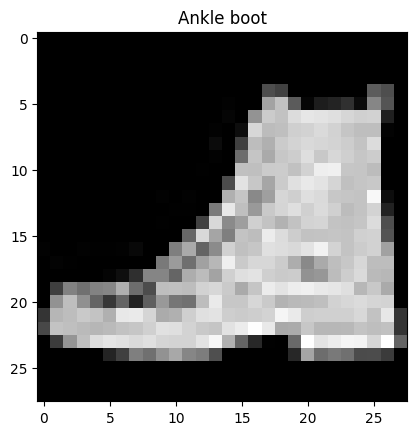

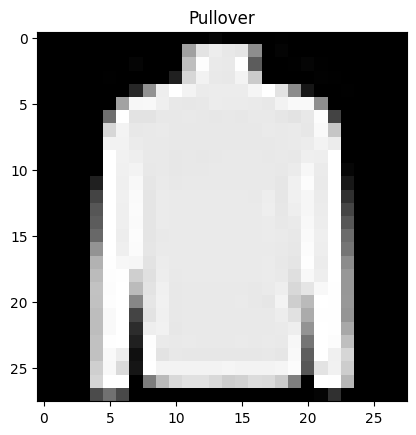

In [95]:
for image, label in train_ds.take(2):
  plt.title("{}".format(class_names[label[0]]))
  plt.imshow(image[0, :, :], cmap='gray')
  plt.show()

<br>

### 모델 생성
- 임의의 모델

In [96]:
def build_model():
  input = Input(shape=(28, 28), name='input')
  flatten = Flatten(input_shape=[28, 28], name='flatten')(input)
  
  hidden1 = Dense(256, kernel_initializer='he_normal', name='hidden1')(flatten)
  hidden1 = BatchNormalization()(hidden1)
  hidden1 = Activation('relu')(hidden1)
  dropout1 = Dropout(0.5)(hidden1)

  hidden2 = Dense(256, kernel_initializer='he_normal', name='hidden2')(dropout1)
  hidden2 = BatchNormalization()(hidden2)
  hidden2 = Activation('relu')(hidden2)
  dropout2 = Dropout(0.5)(hidden2)

  hidden3 = Dense(100, kernel_initializer='he_normal', name='hidden3')(dropout2)
  hidden3 = BatchNormalization()(hidden3)
  hidden3 = Activation('relu')(hidden3)
  dropout3 = Dropout(0.5)(hidden3)
  
  hidden4 = Dense(50, kernel_initializer='he_normal', name='hidden4')(dropout3)
  hidden4 = BatchNormalization()(hidden4)
  hidden4 = Activation('relu')(hidden4)
  dropout4 = Dropout(0.5)(hidden4)

  output = Dense(10, activation='softmax', name='output')(dropout4)

  model = Model(inputs=[input], outputs=output)

  return model

In [97]:
model = build_model()

In [98]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization_16 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 256)               0         
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                           

<br>

### 모델 컴파일
- 평가(metrics)방식의 다른 방법
  - `tf.keras.metrics.Mean`
  - `tf.keras.metrics.SparseCategoricalAccuracy`

- 위 두 방식을 사용하여 loss값을 좀 더 smooth하게 만들기(평균을 내는 방식)

In [99]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [100]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

<br>

### 모델 학습

<br>

@tf.function 으로 인해 학습이 시작되면 그래프를 생성하여 속도가 빠름


In [101]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [102]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [103]:
epochs = 20

for epoch in range(epochs):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)
  
  template = "Epochs {:3d}\tLoss {:.4f}\tAccuracy: {:.4f}\tTest Loss: {:.4f}\tTest Accuracy: {:.4f}\t"
  print(template.format(epoch+1, 
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

Epochs   1	Loss 0.4842	Accuracy: 82.4183	Test Loss: 0.4109	Test Accuracy: 85.2600	
Epochs   2	Loss 0.4244	Accuracy: 84.5300	Test Loss: 0.3881	Test Accuracy: 85.9250	
Epochs   3	Loss 0.3932	Accuracy: 85.5989	Test Loss: 0.3803	Test Accuracy: 86.1833	
Epochs   4	Loss 0.3715	Accuracy: 86.3321	Test Loss: 0.3696	Test Accuracy: 86.5400	
Epochs   5	Loss 0.3550	Accuracy: 86.8987	Test Loss: 0.3635	Test Accuracy: 86.7720	
Epochs   6	Loss 0.3413	Accuracy: 87.3733	Test Loss: 0.3639	Test Accuracy: 86.7717	
Epochs   7	Loss 0.3296	Accuracy: 87.7852	Test Loss: 0.3607	Test Accuracy: 86.8471	
Epochs   8	Loss 0.3194	Accuracy: 88.1408	Test Loss: 0.3575	Test Accuracy: 87.0212	
Epochs   9	Loss 0.3105	Accuracy: 88.4498	Test Loss: 0.3554	Test Accuracy: 87.1567	
Epochs  10	Loss 0.3021	Accuracy: 88.7435	Test Loss: 0.3540	Test Accuracy: 87.3210	
Epochs  11	Loss 0.2945	Accuracy: 89.0118	Test Loss: 0.3522	Test Accuracy: 87.4573	
Epochs  12	Loss 0.2877	Accuracy: 89.2522	Test Loss: 0.3508	Test Accuracy: 87.5667	
Epoc

<br>

### 모델 학습 : 2번째 방법 (Keras)

In [106]:
from sklearn.model_selection import train_test_split

In [110]:
(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=777)

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

model = build_model()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

(42000, 28, 28)
(42000,)
(18000, 28, 28)
(18000,)
(10000, 28, 28)
(10000,)


<br>

5~6분 소요

In [111]:
from tensorflow.keras.callbacks import EarlyStopping

In [115]:
early_stopping_cb = EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(x_train, y_train,
                    batch_size=256, epochs=20, shuffle=True,
                    validation_data=(x_val, y_val), callbacks=[early_stopping_cb], verbose=False)

<br>

### 모델 평가

In [117]:
model.evaluate(x_test, y_test, batch_size=100)

100/100 [==============================] - 1s 10ms/step - loss: 0.6924 - acc: 0.7097


[0.6924100518226624, 0.7096999883651733]

<br>

### 결과 확인

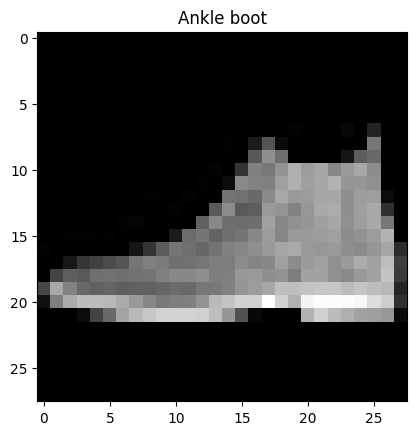

In [118]:
test_img = x_test[0, :, :]

plt.title(class_names[y_test[0]])
plt.imshow(test_img, cmap='gray')
plt.show()

<br>

In [119]:
pred = model.predict(test_img.reshape(1, 28, 28))

1/1 [==============================] - 17s 17s/step


In [120]:
pred.shape

(1, 10)

In [121]:
class_names[np.argmax(pred)]

'Ankle boot'

<br>


### Test Batch Dataset

In [122]:
test_batch = x_test[:32, :, :]
test_batch_y = y_test[:32]
print(test_batch.shape)

(32, 28, 28)


In [123]:
preds = model.predict(test_batch)
preds.shape

1/1 [==============================] - 0s 25ms/step


(32, 10)

In [126]:
pred_args = np.argmax(preds, -1)

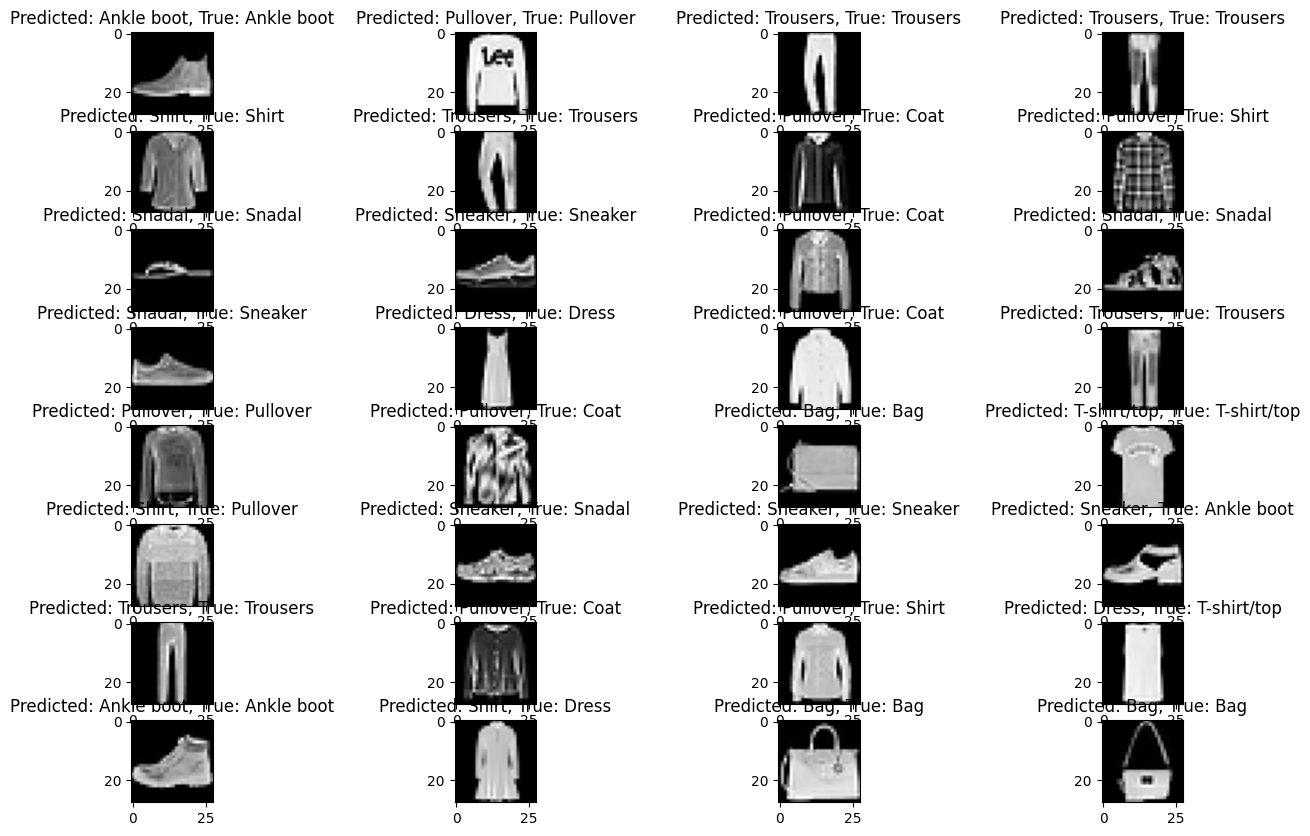

In [127]:
num_rows=8
num_cols=4
num_images = num_rows * num_cols

plt.figure(figsize=(16, 10))

for idx in range(1, 33, 1):
  plt.subplot(num_rows, num_cols, idx)
  plt.title("Predicted: {}, True: {}".format(class_names[pred_args[idx-1]],
                                             class_names[test_batch_y[idx-1]]))
  
  plt.imshow(test_batch[idx-1], cmap='gray')

plt.show()